In [1]:
import os
os.chdir('/home/abhijeet/abhijeet/tutorial/Kaggle/ashrae-energy-prediction/')

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BUILDING = pd.read_csv('data/raw/building_metadata.csv')

###  Insight about the buildings !!


In [4]:
BUILDING.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [5]:
BUILDING.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


    1. Checking for the distribution of building age
    2. Checking the distribution of size of the buildings
    3. Checking the distribution of floor Count

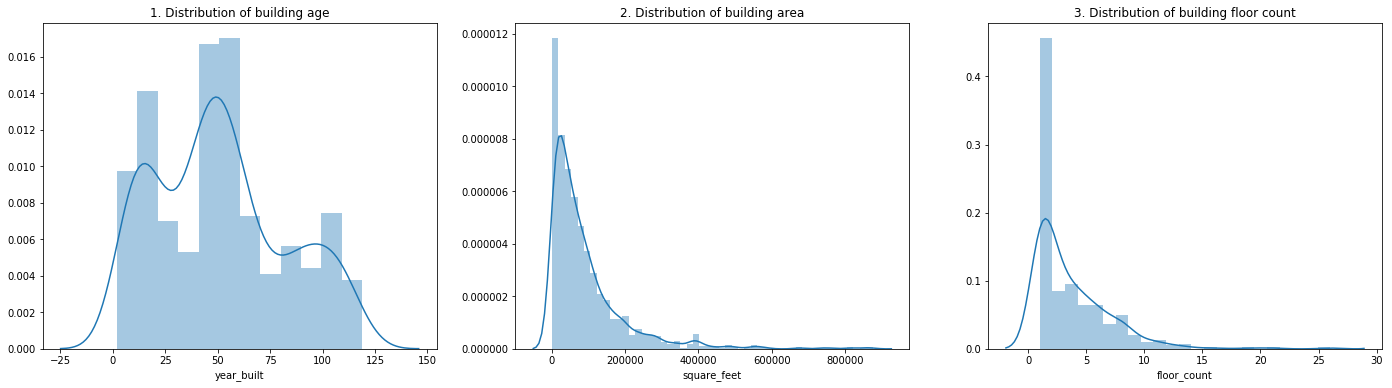

In [6]:
figsize = (24, 6)
fig = plt.figure(figsize = figsize)

ax1 = fig.add_subplot(131)
BUILDING_AGE =  2019 - BUILDING['year_built']
sns.distplot(BUILDING_AGE.dropna())
ax1.set_title('1. Distribution of building age')

ax2 = fig.add_subplot(132)
sns.distplot(BUILDING.square_feet.dropna())
ax2.set_title('2. Distribution of building area')

ax3 = fig.add_subplot(133)
sns.distplot(BUILDING.floor_count.dropna())
ax3.set_title('3. Distribution of building floor count')

plt.show()

    4. Showing the primary use of the building!!

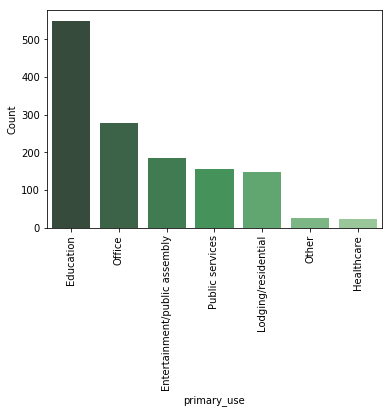

In [17]:
ax = sns.countplot(x="primary_use", data=BUILDING, palette="Greens_d", order = BUILDING.primary_use.value_counts().iloc[:7].index )
ax.set(ylabel="Count")
plt.xticks(rotation = 90)
plt.show()